# 资产组合最优分析

## 导入包

In [1]:
import pandas as pd
import akshare as ak


C:\Users\jason\anaconda3\envs\riskfolio\lib\site-packages\akshare\__init__.py:2747: UserWarning: 为了支持更多特性，请将 Python 升级到 3.9.0 及以上版本！
  warnings.warn(


In [13]:
import akshare as ak

fund_name_em_df = ak.fund_name_em()
fund_name_em_df

,基金代码,拼音缩写,基金简称,基金类型,拼音全称
0,000001,HXCZHH,华夏成长混合,混合型-灵活,HUAXIACHENGZHANGHUNHE
1,000002,HXCZHH,华夏成长混合(后端),混合型-灵活,HUAXIACHENGZHANGHUNHE
2,000003,ZHKZZZQA,中海可转债债券A,债券型-混合二级,ZHONGHAIKEZHUANZHAIZHAIQUANA
3,000004,ZHKZZZQC,中海可转债债券C,债券型-混合二级,ZHONGHAIKEZHUANZHAIZHAIQUANC
4,000005,JSZQXYDQZQ,嘉实增强信用定期债券,债券型-长债,JIASHIZENGQIANGXINYONGDINGQIZHAIQUAN
...,...,...,...,...,...
21111,970210,ZXJTXXZQC,中信建投欣享债券C,债券型-中短债,ZHONGXINJIANTOUXINXIANGZHAIQUANC
21112,970211,ZXJTYX12GYCYQZQA,中信建投悠享12个月持有期债券A,债券型-混合一级,ZHONGXINJIANTOUYOUXIANG12GEYUECHIYOUQIZHAIQUANA
21113,970212,ZXJTYX12GYCYQZQC,中信建投悠享12个月持有期债券C,债券型-混合一级,ZHONGXINJIANTOUYOUXIANG12GEYUECHIYOUQIZHAIQUANC
21114,970213,ZXJTYX6GYCYQZQA,中信建投悦享6个月持有期债券A,债券型-混合一级,ZHONGXINJIANTOUYUEXIANG6GEYUECHIYOUQIZHAIQUANA


## 确定组合分析的基金列表

In [2]:
sw_index_list = ['040046',
                 '007380',
                 '015016',
                 '013308',
                 '016630',
                 '162411',
                 '160416',
                 '000369',
                 '005613',
                 '007721',
                 '008763',
                 '001668',
                 '006282',
                 '000043',
                 '164701',
                 '164824',
                 '519191',
                 '000893'
                ]

In [3]:
fund_df = pd.DataFrame()
# 逐个获取指数行情数据
i = 0
for code in sw_index_list:
    bars = ak.fund_individual_basic_info_xq(symbol=code)
    bars.index = bars['item']
    fund_df[code] = bars['value']
    i += 1
    print("\r已获取[{}/{}]支基金的数据".format(i, len(sw_index_list)), end="")  # 输出处理进度
fund_df.columns =sw_index_list

已获取[18/18]支基金的数据

### 基金基本信息

In [82]:
fund_df

,040046,007380,015016,013308,016630,162411,160416,000369,005613,007721,008763,001668,006282,000043,164701,164824,519191,000893
item,,,,,,,,,,,,,,,,,,
基金代码,040046,007380,015016,013308,016630,162411,160416,000369,005613,007721,008763,001668,006282,000043,164701,164824,519191,000893
基金名称,华安纳斯达克100指数A,易方达上证50ETF联接发起式C,华安国际龙头（DAX）ETF联接C,易方达恒生科技ETF联接（QDII）A,易方达中证1000ETF联接A,华宝标普油气上游股票人民币A,华安标普全球石油指数,广发全球医疗保健,摩根富时发达市场REITs(QDII)人民币A,天弘标普500（QDII-FOF）A,天弘越南市场股票A,汇添富全球移动互联网,摩根欧洲动力(QDII),嘉实美国成长股票,汇添富黄金及贵金属,工银印度基金人民币,万家新利混合,工银创新动力股票
基金全称,华安纳斯达克100交易型开放式指数证券投资基金联接基金(QDII),易方达上证50交易型开放式指数证券投资基金发起式联接基金,华安国际龙头(DAX)交易型开放式指数证券投资基金联接基金,易方达恒生科技交易型开放式指数证券投资基金联接基金(QDII),易方达中证1000交易型开放式指数证券投资基金联接基金,华宝标普石油天然气上游股票指数证券投资基金(LOF),华安标普全球石油指数证券投资基金(LOF),广发全球医疗保健指数证券投资基金,摩根富时发达市场REITs指数型证券投资基金(QDII),天弘标普500发起式证券投资基金(QDII-FOF),天弘越南市场股票型发起式证券投资基金(QDII),汇添富全球移动互联灵活配置混合型证券投资基金,摩根欧洲动力策略股票型证券投资基金(QDII),嘉实美国成长股票型证券投资基金,汇添富黄金及贵金属证券投资基金(LOF),工银瑞信印度市场证券投资基金(LOF),万家新利灵活配置混合型证券投资基金,工银瑞信创新动力股票型证券投资基金
成立时间,2013-08-02,2019-09-09,2022-02-22,2022-04-29,2023-01-18,2011-09-29,2012-03-29,2013-12-10,2018-04-26,2019-09-24,2020-01-20,2017-01-25,2018-10-31,2013-06-14,2011-08-31,2018-06-15,2014-01-24,2014-12-11
最新规模,32.35亿,5.54亿,5361.42万,6.55亿,1.74亿,22.21亿,3.24亿,7.19亿,3.44亿,2.73亿,29.11亿,15.70亿,7711.85万,13.90亿,1.11亿,15.21亿,9.39亿,59.47亿
基金公司,华安基金管理有限公司,易方达基金管理有限公司,华安基金管理有限公司,易方达基金管理有限公司,易方达基金管理有限公司,华宝基金管理有限公司,华安基金管理有限公司,广发基金管理有限公司,摩根基金管理（中国）有限公司,天弘基金管理有限公司,天弘基金管理有限公司,汇添富基金管理股份有限公司,摩根基金管理（中国）有限公司,嘉实基金管理有限公司,汇添富基金公司,工银瑞信基金有限公司,万家基金管理公司,工银瑞信基金管理有限公司
基金经理,倪斌,余海燕,倪斌,潘令旦,刘树荣 庞亚平,周晶 杨洋,倪斌,刘杰,张军 胡迪,胡超,胡超,杨瑨,张军,张自力,过蓓蓓,刘伟琳,黄海,杨鑫鑫
托管银行,中国建设银行股份有限公司,招商银行股份有限公司,招商银行股份有限公司,招商银行股份有限公司,国泰君安证券股份有限公司,中国建设银行股份有限公司,中国建设银行股份有限公司,广发银行股份有限公司,招商银行股份有限公司,中信银行股份有限公司,交通银行股份有限公司,中国工商银行股份有限公司,招商银行股份有限公司,中国银行股份有限公司,中国工商银行股份有限公司,招商银行股份有限公司,中国建设银行股份有限公司,中国农业银行股份有限公司
基金类型,QDII-股票,股票型-标准指数,QDII-股票,QDII-股票,股票型-标准指数,QDII-股票,QDII-股票,QDII-股票,QDII-房地产信托,QDII-混合,QDII-股票,QDII-混合,QDII-股票,QDII-股票,QDII-商品,QDII-股票,混合型-灵活配置,股票型-普通


## 筛选基金成立时间

In [6]:
fund_df_filtered = fund_df.loc['成立时间']
# 将Series转换为DataFrame
df = fund_df_filtered.reset_index()
df.columns = ['index', 'date']

# 将日期字符串转换为datetime对象
df['date'] = pd.to_datetime(df['date'])

# 筛选出某一年之前的日期
year = 2024
df_before_data = df[df['date'].dt.year < year]

# 输出最后的列表
index_list = df_before_data['index'].tolist()
index_list

['040046',
 '007380',
 '015016',
 '013308',
 '016630',
 '162411',
 '160416',
 '000369',
 '005613',
 '007721',
 '008763',
 '001668',
 '006282',
 '000043',
 '164701',
 '164824',
 '519191',
 '000893']

In [7]:
# 获取资产池的历史价格
price_df = pd.DataFrame()
# 逐个获取指数行情数据
i = 0
for code in index_list:
    bars = ak.fund_open_fund_info_em(symbol=code, indicator="累计净值走势")
    bars['净值日期'] = pd.to_datetime(bars['净值日期']).dt.strftime('%Y-%m-%d')
    bars.index = pd.to_datetime(bars['净值日期'])
    price_df[code] = bars['累计净值']
    i += 1
    print("\r已获取[{}/{}]支基金的数据".format(i, len(index_list)), end="")  # 输出处理进度
price_df.columns = index_list

已获取[18/18]支基金的数据

In [9]:
price_df.head()

,040046,007380,015016,013308,016630,162411,160416,000369,005613,007721,008763,001668,006282,000043,164701,164824,519191,000893
净值日期,,,,,,,,,,,,,,,,,,
2013-08-02,1.000,NaN,NaN,NaN,NaN,1.077,1.073,NaN,NaN,NaN,NaN,NaN,NaN,1.039,0.682,NaN,NaN,NaN
2013-08-09,1.001,NaN,NaN,NaN,NaN,1.061,1.068,NaN,NaN,NaN,NaN,NaN,NaN,1.026,0.687,NaN,NaN,NaN
2013-08-16,1.001,NaN,NaN,NaN,NaN,1.038,1.063,NaN,NaN,NaN,NaN,NaN,NaN,1.007,0.720,NaN,NaN,NaN
2013-08-23,1.002,NaN,NaN,NaN,NaN,1.048,1.063,NaN,NaN,NaN,NaN,NaN,NaN,1.015,0.734,NaN,NaN,NaN
2013-08-26,1.002,NaN,NaN,NaN,NaN,1.049,1.061,NaN,NaN,NaN,NaN,NaN,NaN,1.013,0.737,NaN,NaN,NaN


In [15]:
from datetime import datetime, timedelta

# 获取当前日期
current_date = datetime.now()

# 计算24个月前的日期
start_date = current_date - timedelta(days=24*365/12)

# 将日期格式化为字符串
start_date_str = start_date.strftime('%Y-%m-%d')

# 将end_date设置为当前日期
end_date_str = current_date.strftime('%Y-%m-%d')

In [10]:
# 选取指定日期范围的数据
start_date = '2021-01-01'
end_date = '2024-03-28'
price_df = price_df[(price_df.index >= start_date) & (price_df.index <= end_date)]

price_df

,040046,007380,015016,013308,016630,162411,160416,000369,005613,007721,008763,001668,006282,000043,164701,164824,519191,000893
净值日期,,,,,,,,,,,,,,,,,,
2021-01-04,3.740,1.3797,NaN,NaN,NaN,0.2931,0.853,1.860,1.0396,1.1379,1.1884,2.898,1.1472,2.733,0.839,1.0530,1.4337,0.824
2021-01-05,3.734,1.3929,NaN,NaN,NaN,0.3080,0.871,1.846,1.0304,1.1327,1.1906,2.932,1.1366,2.729,0.833,1.0551,1.4402,0.825
2021-01-06,3.673,1.4113,NaN,NaN,NaN,0.3183,0.888,1.857,1.0334,1.1400,1.2006,2.892,1.1556,2.702,0.818,1.0533,1.4433,0.824
2021-01-07,3.766,1.4369,NaN,NaN,NaN,0.3247,0.901,1.871,1.0302,1.1532,1.2178,2.933,1.1655,2.772,0.817,1.0520,1.4317,0.825
2021-01-08,3.820,1.4301,NaN,NaN,NaN,0.3202,0.902,1.883,1.0356,1.1598,1.2338,2.977,1.1655,2.802,0.793,1.0709,1.4418,0.828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-22,5.659,1.0356,1.515,0.8817,0.8036,0.8289,1.742,2.440,1.2488,1.6855,1.4978,3.372,1.4044,4.256,0.932,1.4473,2.4109,1.031
2024-03-25,5.639,1.0349,1.514,0.8767,0.7861,0.8374,1.754,2.435,1.2433,1.6814,1.4784,3.363,1.4007,4.247,0.935,1.4464,2.3979,1.028
2024-03-26,5.615,1.0398,1.525,0.8845,0.7833,0.8268,1.743,2.439,1.2393,1.6782,1.4960,3.346,1.4070,4.225,0.936,1.4496,2.3532,1.029


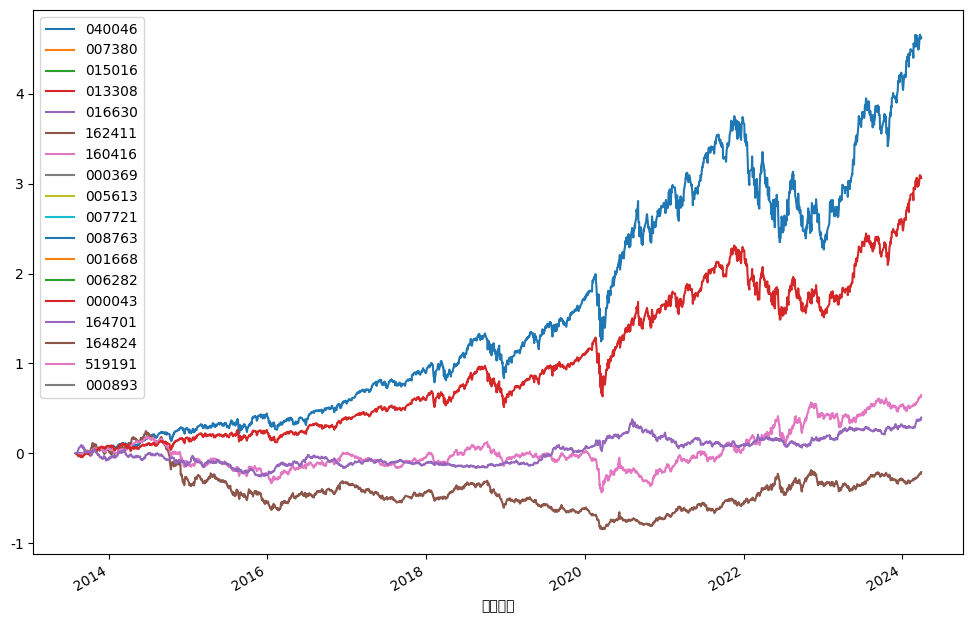

In [86]:
# 在matplotlib绘图中显示中文和负号
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['axes.unicode_minus'] = False   # 解决坐标轴负数的负号显示问题
fig = plt.figure(figsize=(12, 8)) 
ax = fig.add_subplot(111)
(price_df.div(price_df.iloc[0])-1).plot(ax=ax)
plt.show()

In [11]:
import riskfolio as rp
#计算资产收益率Y：
Y = price_df.pct_change().dropna()
# Building the portfolio object
port = rp.Portfolio(returns=Y)
# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

In [12]:
display(w.T)

,040046,007380,015016,013308,016630,162411,160416,000369,005613,007721,008763,001668,006282,000043,164701,164824,519191,000893
weights,0.304595,1.344637e-10,8.026015e-10,6.579756e-11,8.973581e-11,1.195964e-09,0.016183,3.235739e-09,1.920442e-10,3.738324e-09,0.118233,9.019643e-10,0.088738,3.157683e-09,0.242816,0.134031,0.095404,5.306757e-10


In [121]:
display(w.T)

,040046,007380,015016,013308,016630,162411,160416,000369,005613,007721,008763,001668,006282,000043,164701,164824,519191,000893
weights,0.304595,1.344637e-10,8.026015e-10,6.579756e-11,8.973581e-11,1.195964e-09,0.016183,3.235739e-09,1.920442e-10,3.738324e-09,0.118233,9.019643e-10,0.088738,3.157683e-09,0.242816,0.134031,0.095404,5.306757e-10


In [122]:
display(Y.head())

,040046,007380,015016,013308,016630,162411,160416,000369,005613,007721,008763,001668,006282,000043,164701,164824,519191,000893
净值日期,,,,,,,,,,,,,,,,,,
2023-01-19,-0.009384,0.003431,-0.014207,-0.015178,0.0000,0.019837,0.002618,0.000916,-0.003498,-0.009414,0.010288,-0.002439,-0.007650,-0.007457,0.008642,0.001922,0.009317,0.007179
2023-01-20,0.029011,0.005300,0.011209,0.024325,0.0001,0.013519,0.009138,0.004119,0.011129,0.014979,0.000395,0.032274,0.009149,0.021788,0.000000,0.003086,0.015234,0.011202
2023-01-30,0.023303,0.000765,0.007126,0.001631,0.0000,-0.020416,-0.010349,-0.015041,0.022013,0.015076,-0.008443,0.014211,0.009150,0.015441,-0.003672,-0.035839,-0.015999,-0.002014
2023-01-31,0.015462,-0.010365,-0.002358,-0.008868,0.0000,0.014728,0.001961,0.006478,0.009527,0.008051,0.012653,0.008407,-0.001997,0.014844,0.000000,0.003191,0.002676,-0.001009
2023-02-01,0.020210,0.004293,0.002364,0.029672,0.0000,-0.023826,-0.014351,-0.000460,0.003365,0.006281,-0.042200,0.026864,0.001667,0.013557,0.007371,-0.011520,0.000302,0.008081


                                     CVXPY                                     
                                     v1.4.2                                    
(CVXPY) Apr 01 11:13:30 AM: Your problem has 864 variables, 4 constraints, and 0 parameters.
(CVXPY) Apr 01 11:13:30 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 01 11:13:30 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 01 11:13:30 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Apr 01 11:13:30 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 01 11:13:30 AM: Compiling problem (target solver=SCS).
(CVX

(CVXPY) Apr 01 11:13:33 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 01 11:13:33 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 01 11:13:33 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Apr 01 11:13:33 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 01 11:13:33 AM: Compiling problem (target solver=SCS).
(CVXPY) Apr 01 11:13:33 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Apr 01 11:13:33 AM: Applying reduction FlipObjective
(CVXPY) Apr 01 11:13:33 AM: Applying reduction D

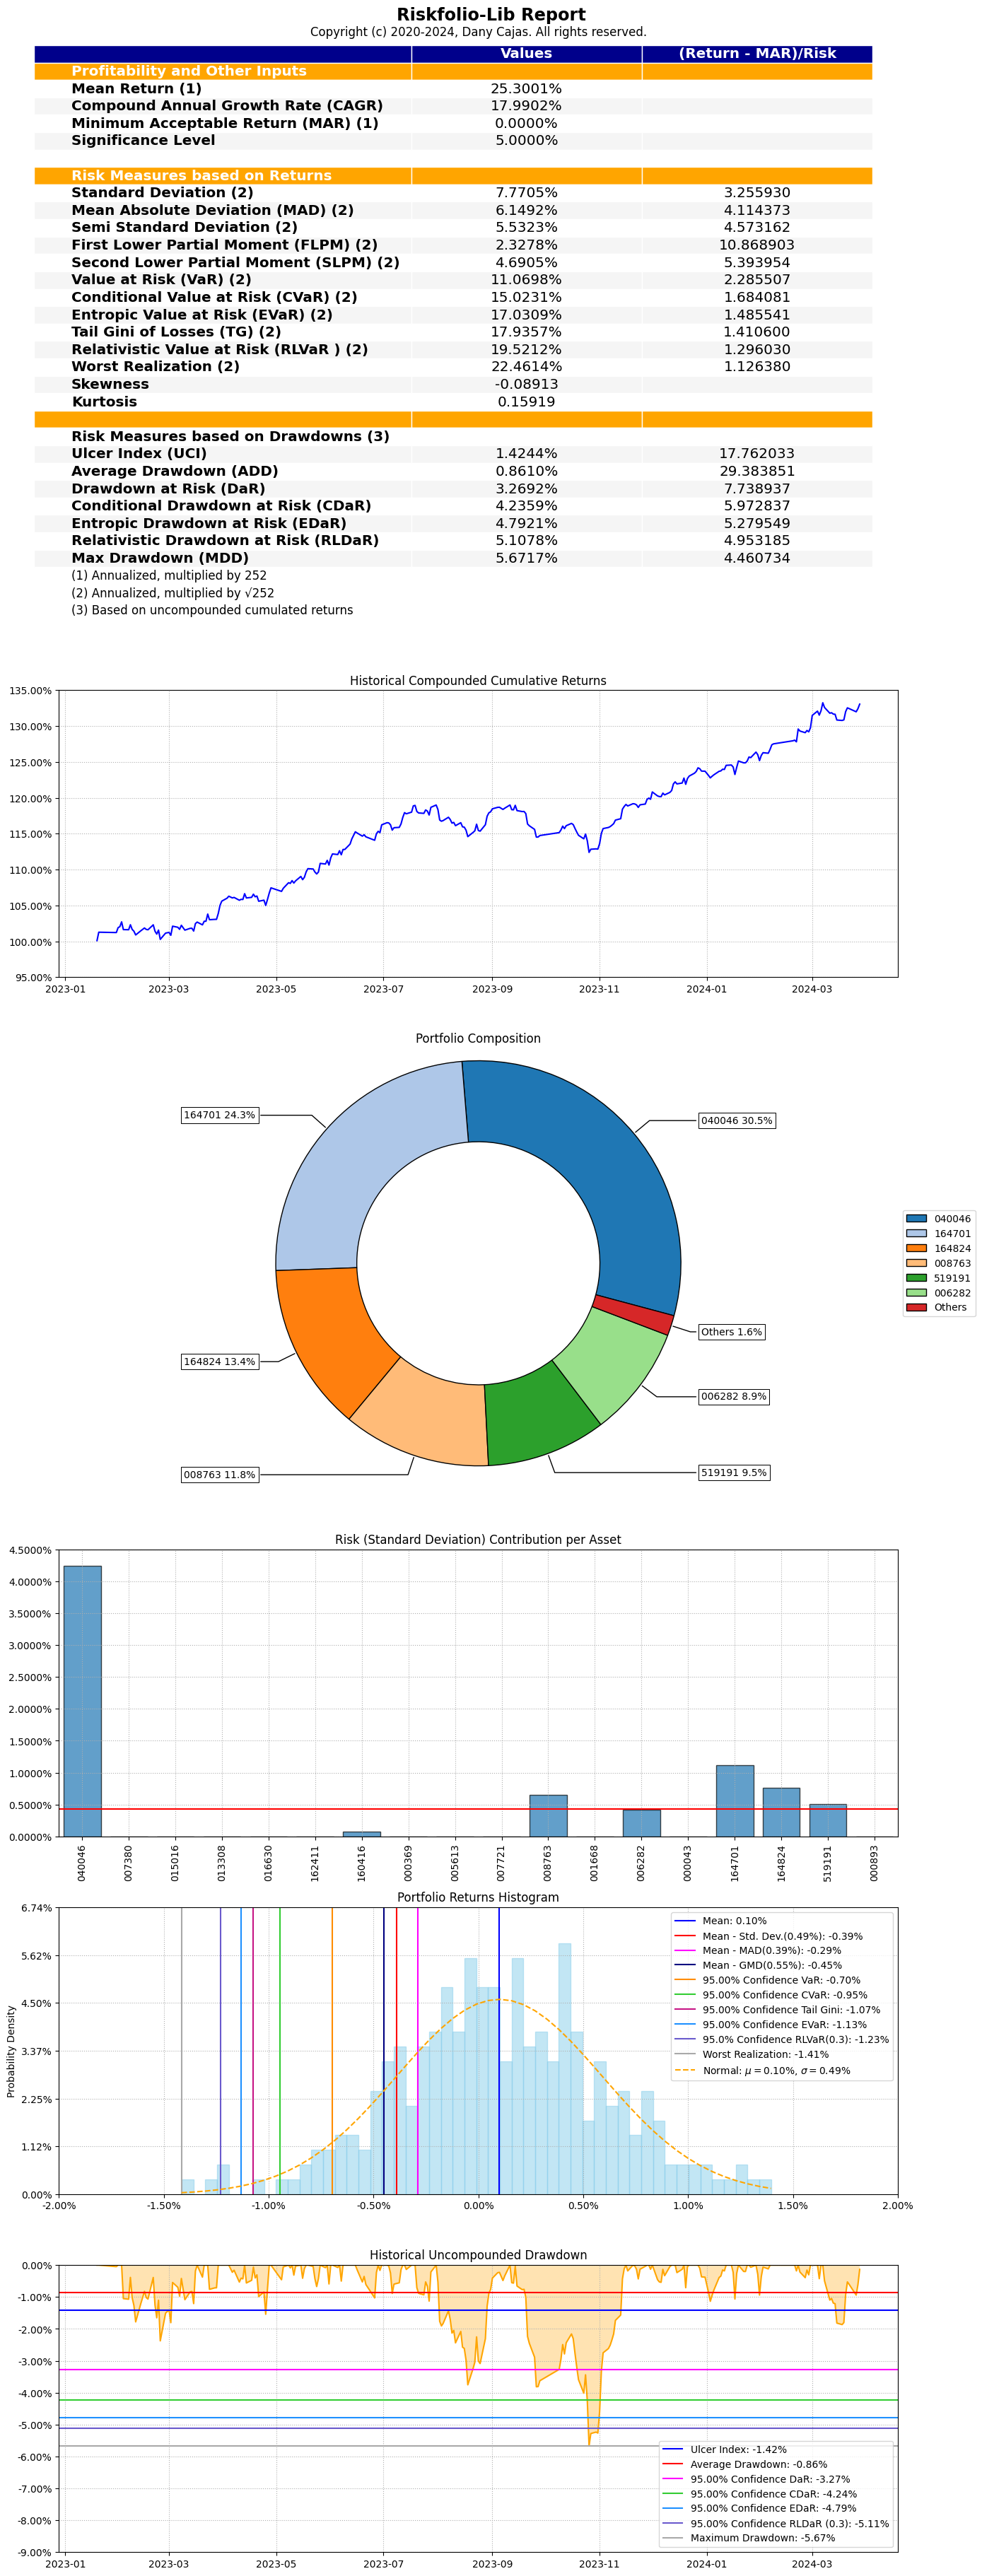

In [123]:
returns = port.returns

ax = rp.jupyter_report(returns,
                       w,
                       rm=rm,
                       rf=0,
                       alpha=0.05,
                       others=0.05,
                       nrow=25,
                       height=6,
                       width=14,
                       t_factor=252,
                       ini_days=1,
                       days_per_year=252,
                       bins=50,
                       solver='ECOS',
                       )

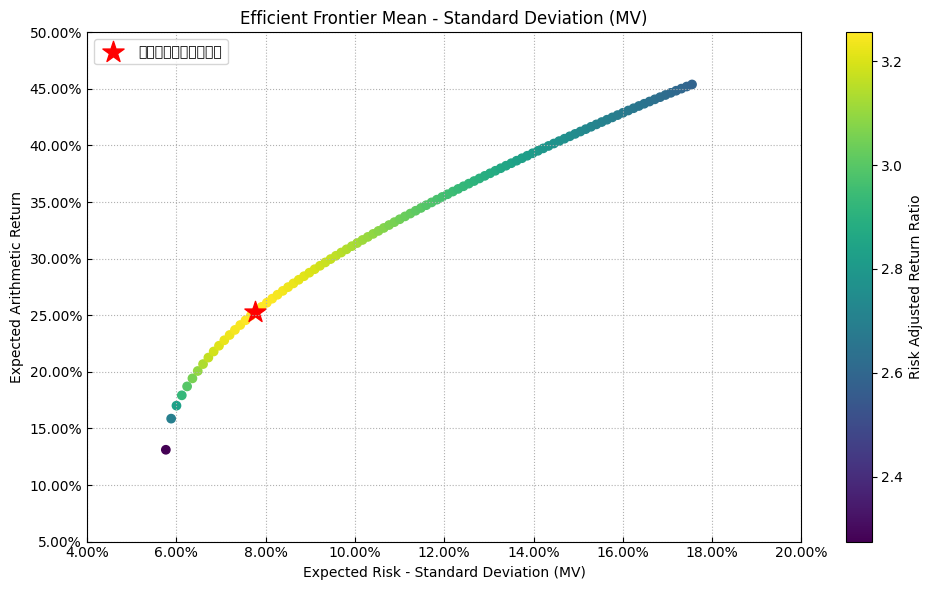

In [124]:
# 设置有效前沿的点数
points = 100

# 计算有效前沿
frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)
# 设置标签和其他参数
label = '最大夏普比率投资组合' # 点的标题
mu = port.mu # 预期收益
cov = port.cov # 协方差矩阵
returns = port.returns # 资产收益率

# 绘制有效前沿
ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05, cmap='viridis', w=w, 
                      label=label, marker='*', s=16, c='r', height=6, width=10, ax=None)

In [148]:
w_new = w.copy()
w_new['权重'] = round(w['weights']*100,2)
w_name=fund_df.loc['基金名称'].pipe(pd.DataFrame)
folio = pd.concat([w_new,w_name],axis=1)
folio[folio['权重'] > 0].sort_values('权重', ascending=False)

,weights,权重,基金名称
040046,0.304595,30.46,华安纳斯达克100指数A
164701,0.242816,24.28,汇添富黄金及贵金属
164824,0.134031,13.40,工银印度基金人民币
008763,0.118233,11.82,天弘越南市场股票A
519191,0.095404,9.54,万家新利混合
006282,0.088738,8.87,摩根欧洲动力(QDII)
160416,0.016183,1.62,华安标普全球石油指数
